<a href="https://colab.research.google.com/github/KanoonGammy/Python-for-investing/blob/workshops/4_Workshop_RSI_Strategy_show_signal_with_mplfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
import yfinance as yf
import mplfinance as mpf

In [35]:
start = '2020-01-01'
end = '2021-01-01'

data = yf.download('NVDA' , start = start , end = end)

def RSI_Cal(df, days , upper , lower):
    diff = df['Close'].diff(1)

    #find RS to RSI
    gain = diff.mask(diff < 0 , 0 )
    loss = diff.mask(diff > 0 , 0)
    RS = gain.rolling(days).mean()/abs(loss.rolling(days).mean())
    RSI = 100 - 100/(1+RS)
    df['RSI'] = RSI
    #find action zone
    df.loc[df['RSI'] > upper , 'action_zone'] = 'sell'
    df.loc[df['RSI']< lower , 'action_zone'] = 'buy'
    #for plotting
    df.loc[df['action_zone'] == 'buy' , 'mark_position'] = 0.95*df['Low']
    df.loc[df['action_zone'] == 'sell' , 'mark_position'] = 1.05*df['High']

    return df

def RSI_plot(df ,days, upper, lower):
    df = RSI_Cal(df , days , upper , lower)
    #define upper lower as time series
    df['lower'] = lower
    df['upper'] = upper
    rsi_ylim = (0,100)

    #making plots for adding 
    mpf_rsi = mpf.make_addplot(df['RSI'] , panel = 1 , color = 'purple' , title = 'RSI' , ylim = rsi_ylim)
    mpf_upper = mpf.make_addplot(df['lower'] , panel = 1 , color = 'red')
    mpf_lower = mpf.make_addplot(df['upper'] , panel = 1 , color = 'red')

    #making markers
    markers = ['^' if x == 'buy' else 'v' for x in df['action_zone']]
    color_marker = ['green' if x == 'buy' else 'red' for x in df['action_zone']]
    plot_signal = mpf.make_addplot(df['mark_position'] , type = 'scatter' , marker = markers , color = color_marker)
    plots = [mpf_rsi , mpf_upper , mpf_lower , plot_signal ]
    #return addplots as list
    return plots


[*********************100%***********************]  1 of 1 completed


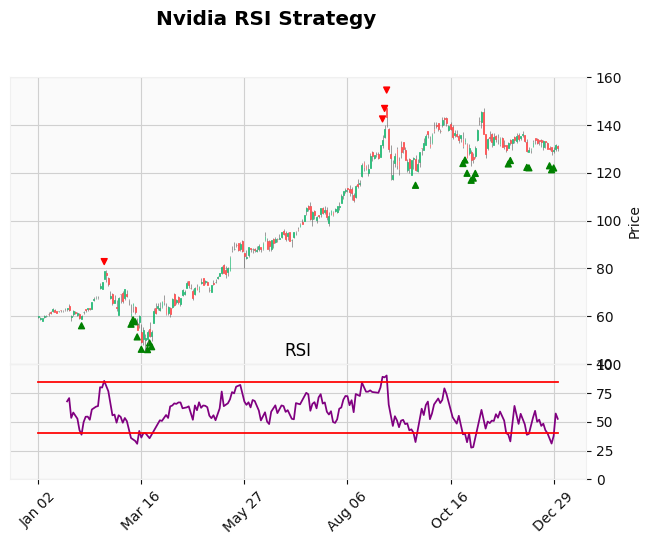

In [65]:
rsi_to_plot = RSI_plot(data,14 , 85 , 40)
mpf.plot(data, type='candle', style='yahoo', addplot=rsi_to_plot,
                       title='Nvidia RSI Strategy')

In [66]:
action_data = data.copy()
action_data

,Open,High,Low,Close,Adj Close,Volume,RSI,action_zone,mark_position,lower,upper
Date,,,,,,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.770546,23753600,NaN,NaN,NaN,40,85
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.813862,20538400,NaN,NaN,NaN,40,85
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.060513,26263600,NaN,NaN,NaN,40,85
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.775532,31485600,NaN,NaN,NaN,40,85
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.887650,27710800,NaN,NaN,NaN,40,85
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,130.372498,131.324997,129.387497,129.937500,129.702835,9788400,34.651973,buy,122.918122,40,85
2020-12-28,130.625000,130.625000,127.632500,129.000000,128.767014,21256400,31.245840,buy,121.250875,40,85
2020-12-29,129.250000,130.725006,128.422501,129.432495,129.198730,17037200,37.827300,buy,122.001376,40,85


In [67]:
action_data['action_price'] = action_data['Open'].shift(-1)
action_data

,Open,High,Low,Close,Adj Close,Volume,RSI,action_zone,mark_position,lower,upper,action_price
Date,,,,,,,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.770546,23753600,NaN,NaN,NaN,40,85,58.775002
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.813862,20538400,NaN,NaN,NaN,40,85,58.080002
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.060513,26263600,NaN,NaN,NaN,40,85,59.549999
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.775532,31485600,NaN,NaN,NaN,40,85,59.939999
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.887650,27710800,NaN,NaN,NaN,40,85,60.962502
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,130.372498,131.324997,129.387497,129.937500,129.702835,9788400,34.651973,buy,122.918122,40,85,130.625000
2020-12-28,130.625000,130.625000,127.632500,129.000000,128.767014,21256400,31.245840,buy,121.250875,40,85,129.250000
2020-12-29,129.250000,130.725006,128.422501,129.432495,129.198730,17037200,37.827300,buy,122.001376,40,85,129.902496


In [68]:
record = action_data[action_data.action_zone.notnull()]
record

,Open,High,Low,Close,Adj Close,Volume,RSI,action_zone,mark_position,lower,upper,action_price
Date,,,,,,,,,,,,
2020-02-03,58.924999,60.277500,58.862499,60.082500,59.875191,25556400,38.965721,buy,55.919374,40,85,61.507500
2020-02-19,75.372498,78.852501,75.372498,78.675003,78.403519,69433200,85.737897,sell,82.795126,40,85,78.192497
2020-03-09,59.974998,64.849998,59.544998,61.360001,61.184860,61416000,36.067359,buy,56.567748,40,85,64.135002
2020-03-10,64.135002,65.269997,61.497501,65.269997,65.083687,58064800,35.187836,buy,58.422626,40,85,63.865002
2020-03-11,63.865002,64.150002,60.642502,61.617500,61.441624,49996400,33.589994,buy,57.610377,40,85,56.365002
2020-03-12,56.365002,59.029999,53.950001,54.077499,53.923145,81654000,31.047083,buy,51.252501,40,85,57.625000
2020-03-16,53.102501,56.525002,48.500000,49.099998,48.959850,72697200,36.440991,buy,46.075000,40,85,50.227501
2020-03-19,50.490002,54.182499,48.347500,53.242500,53.090523,76551200,38.554358,buy,45.930125,40,85,54.750000
2020-03-20,54.750000,57.580002,51.282501,51.437500,51.290672,80463600,35.880942,buy,48.718376,40,85,51.427502


In [69]:
record['helper'] = record.action_zone.shift(-1)
record

<ipython-input-69-c463629d3b7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['helper'] = record.action_zone.shift(-1)


,Open,High,Low,Close,Adj Close,Volume,RSI,action_zone,mark_position,lower,upper,action_price,helper
Date,,,,,,,,,,,,,
2020-02-03,58.924999,60.277500,58.862499,60.082500,59.875191,25556400,38.965721,buy,55.919374,40,85,61.507500,sell
2020-02-19,75.372498,78.852501,75.372498,78.675003,78.403519,69433200,85.737897,sell,82.795126,40,85,78.192497,buy
2020-03-09,59.974998,64.849998,59.544998,61.360001,61.184860,61416000,36.067359,buy,56.567748,40,85,64.135002,buy
2020-03-10,64.135002,65.269997,61.497501,65.269997,65.083687,58064800,35.187836,buy,58.422626,40,85,63.865002,buy
2020-03-11,63.865002,64.150002,60.642502,61.617500,61.441624,49996400,33.589994,buy,57.610377,40,85,56.365002,buy
2020-03-12,56.365002,59.029999,53.950001,54.077499,53.923145,81654000,31.047083,buy,51.252501,40,85,57.625000,buy
2020-03-16,53.102501,56.525002,48.500000,49.099998,48.959850,72697200,36.440991,buy,46.075000,40,85,50.227501,buy
2020-03-19,50.490002,54.182499,48.347500,53.242500,53.090523,76551200,38.554358,buy,45.930125,40,85,54.750000,buy
2020-03-20,54.750000,57.580002,51.282501,51.437500,51.290672,80463600,35.880942,buy,48.718376,40,85,51.427502,buy


In [70]:
record = record.loc[record['helper']!=record['action_zone']]
record

,Open,High,Low,Close,Adj Close,Volume,RSI,action_zone,mark_position,lower,upper,action_price,helper
Date,,,,,,,,,,,,,
2020-02-03,58.924999,60.277500,58.862499,60.082500,59.875191,25556400,38.965721,buy,55.919374,40,85,61.507500,sell
2020-02-19,75.372498,78.852501,75.372498,78.675003,78.403519,69433200,85.737897,sell,82.795126,40,85,78.192497,buy
2020-03-23,51.427502,54.119999,49.630001,53.172501,53.020725,64387600,39.217670,buy,47.148501,40,85,57.250000,sell
2020-09-02,147.037506,147.267502,139.000000,143.464996,143.163589,87401200,90.438711,sell,154.630877,40,85,138.287506,buy
2020-12-29,129.250000,130.725006,128.422501,129.432495,129.198730,17037200,37.827300,buy,122.001376,40,85,129.902496,NaN


In [71]:
# record = record.iloc[1:] #จัด row ใหม่ ใช้ iloc จะรันเพื่อดูว่าฝั่ง buy ขึ้นก่อนไหม ใน action_zone ถ้าไม่ก็ใช้ซะ
# record

In [72]:
record['returns'] = record['action_price'].pct_change()
record

<ipython-input-72-c8810a940058>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['returns'] = record['action_price'].pct_change()


,Open,High,Low,Close,Adj Close,Volume,RSI,action_zone,mark_position,lower,upper,action_price,helper,returns
Date,,,,,,,,,,,,,,
2020-02-03,58.924999,60.277500,58.862499,60.082500,59.875191,25556400,38.965721,buy,55.919374,40,85,61.507500,sell,NaN
2020-02-19,75.372498,78.852501,75.372498,78.675003,78.403519,69433200,85.737897,sell,82.795126,40,85,78.192497,buy,0.271268
2020-03-23,51.427502,54.119999,49.630001,53.172501,53.020725,64387600,39.217670,buy,47.148501,40,85,57.250000,sell,-0.267833
2020-09-02,147.037506,147.267502,139.000000,143.464996,143.163589,87401200,90.438711,sell,154.630877,40,85,138.287506,buy,1.415502
2020-12-29,129.250000,130.725006,128.422501,129.432495,129.198730,17037200,37.827300,buy,122.001376,40,85,129.902496,NaN,-0.060635


In [73]:
#จัดให้อ่านเข้าใจง่ายขึ้น
# 1. Reset Index
record.reset_index(inplace = True)
# 2. สร้างวันที่เกิดสัญญาณ buy ขึ้น
record['previous_sig_date'] = record['Date'].shift(1)
# 3. สร้างสถานะขึ้นเพื่อดูว่า เป็นสัญญาณอะไรในวันที่เกิดสัญญาณ
record['previous_action'] = record['action_zone'].shift(1)
# 4. สร้างราคาที่ทำการออกสถานะ จากสัญญาณ
record['previous_act_price'] = record['action_price'].shift(1)
# 5. เปลี่ยนชื่อ Date เฉย ๆ Date มาจากการ reset index 
record.rename(columns={'Date':'today_sig_date'}, inplace=True)
record.rename(columns={'action_zone':'action'}, inplace = True)
record

<ipython-input-73-b5728226c629>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['previous_sig_date'] = record['Date'].shift(1)
<ipython-input-73-b5728226c629>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['previous_action'] = record['action_zone'].shift(1)
<ipython-input-73-b5728226c629>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,today_sig_date,Open,High,Low,Close,Adj Close,Volume,RSI,action,mark_position,lower,upper,action_price,helper,returns,previous_sig_date,previous_action,previous_act_price
0,2020-02-03,58.924999,60.277500,58.862499,60.082500,59.875191,25556400,38.965721,buy,55.919374,40,85,61.507500,sell,NaN,NaT,NaN,NaN
1,2020-02-19,75.372498,78.852501,75.372498,78.675003,78.403519,69433200,85.737897,sell,82.795126,40,85,78.192497,buy,0.271268,2020-02-03,buy,61.507500
2,2020-03-23,51.427502,54.119999,49.630001,53.172501,53.020725,64387600,39.217670,buy,47.148501,40,85,57.250000,sell,-0.267833,2020-02-19,sell,78.192497
3,2020-09-02,147.037506,147.267502,139.000000,143.464996,143.163589,87401200,90.438711,sell,154.630877,40,85,138.287506,buy,1.415502,2020-03-23,buy,57.250000
4,2020-12-29,129.250000,130.725006,128.422501,129.432495,129.198730,17037200,37.827300,buy,122.001376,40,85,129.902496,NaN,-0.060635,2020-09-02,sell,138.287506


In [74]:
record = record[['action','today_sig_date' ,'action_price','returns','previous_sig_date','previous_action','previous_act_price'] ]

In [75]:
profit = record[record.action == 'sell'] #ดู sell เพื่อดูว่า ทำกำไรเท่าไหร่
profit

,action,today_sig_date,action_price,returns,previous_sig_date,previous_action,previous_act_price
1,sell,2020-02-19,78.192497,0.271268,2020-02-03,buy,61.5075
3,sell,2020-09-02,138.287506,1.415502,2020-03-23,buy,57.2500


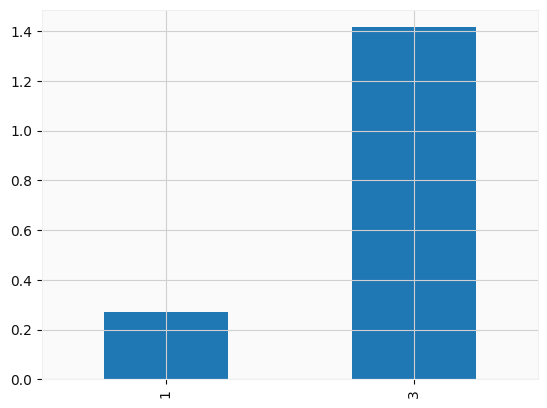

In [76]:
profit['returns'].plot(kind='bar')